In [2]:
# Check GPU status
import tensorflow as tf
print("GPU Available: ", tf.test.is_gpu_available())
if tf.test.is_gpu_available():
    gpu_info = !nvidia-smi
    print("GPU Details:")
    print(gpu_info[0])  # This shows your GPU model (should be T4)

GPU Available:  True
GPU Details:
Fri Oct 17 21:26:47 2025       


In [3]:
# Task 3: NLP with spaCy - Named Entity Recognition & Sentiment Analysis
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random

# Install spaCy and download the model
!pip install spacy
!python -m spacy download en_core_web_sm

print("✅ spaCy setup complete!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 37.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ spaCy setup complete!


In [4]:
# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Test the model
test_text = "Apple is looking at buying U.K. startup for $1 billion"
doc = nlp(test_text)

print("🔍 Testing spaCy NER:")
for ent in doc.ents:
    print(f"  {ent.text} → {ent.label_}")

print("✅ spaCy model loaded successfully!")

🔍 Testing spaCy NER:
  Apple → ORG
  U.K. → GPE
  $1 billion → MONEY
✅ spaCy model loaded successfully!


In [5]:
# Sample Amazon product reviews (realistic examples)
amazon_reviews = [
    "I bought the iPhone 14 from Apple and it's amazing! The battery life is incredible.",
    "This Samsung Galaxy S23 is terrible. The camera quality is poor and it overheats.",
    "Just got the Sony WH-1000XM4 headphones and the noise cancellation is mind-blowing!",
    "The Nike Air Force 1 shoes are comfortable but the quality could be better.",
    "Microsoft Surface Pro is perfect for work, but the price is too high.",
    "This Dell XPS laptop from Amazon is the best computer I've ever owned!",
    "The Google Pixel 7 camera is outstanding, but battery life is disappointing.",
    "I love my new MacBook Pro from Apple, the M2 chip is incredibly fast.",
    "This HP printer is a nightmare! It constantly jams and the ink is expensive.",
    "Bose QuietComfort headphones have excellent sound quality and are very comfortable.",
    "The Lenovo ThinkPad keyboard is fantastic for typing long documents.",
    "This Canon EOS R5 camera takes stunning photos but it's very expensive.",
    "My new Fitbit watch helps me track my fitness goals accurately.",
    "The LG OLED TV has incredible picture quality but the smart features are slow.",
    "This Asus gaming laptop has great performance but gets very loud during games.",
    "I'm disappointed with this Kindle Paperwhite, the screen is too small for reading.",
    "The Dyson vacuum cleaner is powerful but overpriced for what it offers.",
    "This Logitech mouse is reliable and comfortable for long work sessions.",
    "The GoPro Hero 11 is perfect for adventure sports and underwater filming.",
    "This JBL speaker has amazing bass but the battery life could be better."
]

print(f"Created {len(amazon_reviews)} sample Amazon reviews")
print("\nSample reviews:")
for i in range(3):
    print(f"  {i+1}. {amazon_reviews[i]}")

Created 20 sample Amazon reviews

Sample reviews:
  1. I bought the iPhone 14 from Apple and it's amazing! The battery life is incredible.
  2. This Samsung Galaxy S23 is terrible. The camera quality is poor and it overheats.
  3. Just got the Sony WH-1000XM4 headphones and the noise cancellation is mind-blowing!


In [6]:
# Perform Named Entity Recognition on all reviews
print("🔍 EXTRACTING NAMED ENTITIES FROM REVIEWS...")
print("=" * 60)

all_entities = []

for i, review in enumerate(amazon_reviews, 1):
    doc = nlp(review)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    all_entities.extend(entities)

    print(f"\n📝 Review {i}: {review}")
    if entities:
        print("   🎯 Extracted Entities:")
        for entity, label in entities:
            print(f"      • {entity} → {label}")
    else:
        print("   ⚠️  No entities detected")

# Analyze most common entities
print("\n" + "=" * 60)
print("📊 ENTITY ANALYSIS SUMMARY:")
print("=" * 60)

entity_counts = Counter(all_entities)
print("\nMost common entities:")
for (entity, label), count in entity_counts.most_common(10):
    print(f"  {entity} ({label}): {count} occurrences")

# Filter for product-related entities (ORG, PRODUCT, GPE)
product_entities = [(ent, label) for (ent, label) in all_entities if label in ['ORG', 'PRODUCT', 'GPE']]
print(f"\n🎯 Total product-related entities found: {len(product_entities)}")

🔍 EXTRACTING NAMED ENTITIES FROM REVIEWS...

📝 Review 1: I bought the iPhone 14 from Apple and it's amazing! The battery life is incredible.
   🎯 Extracted Entities:
      • 14 → CARDINAL
      • Apple → ORG

📝 Review 2: This Samsung Galaxy S23 is terrible. The camera quality is poor and it overheats.
   🎯 Extracted Entities:
      • S23 → ORG

📝 Review 3: Just got the Sony WH-1000XM4 headphones and the noise cancellation is mind-blowing!
   🎯 Extracted Entities:
      • Sony → ORG

📝 Review 4: The Nike Air Force 1 shoes are comfortable but the quality could be better.
   🎯 Extracted Entities:
      • The Nike Air Force 1 → ORG

📝 Review 5: Microsoft Surface Pro is perfect for work, but the price is too high.
   🎯 Extracted Entities:
      • Microsoft Surface Pro → ORG

📝 Review 6: This Dell XPS laptop from Amazon is the best computer I've ever owned!
   🎯 Extracted Entities:
      • Amazon → ORG

📝 Review 7: The Google Pixel 7 camera is outstanding, but battery life is disappointing.


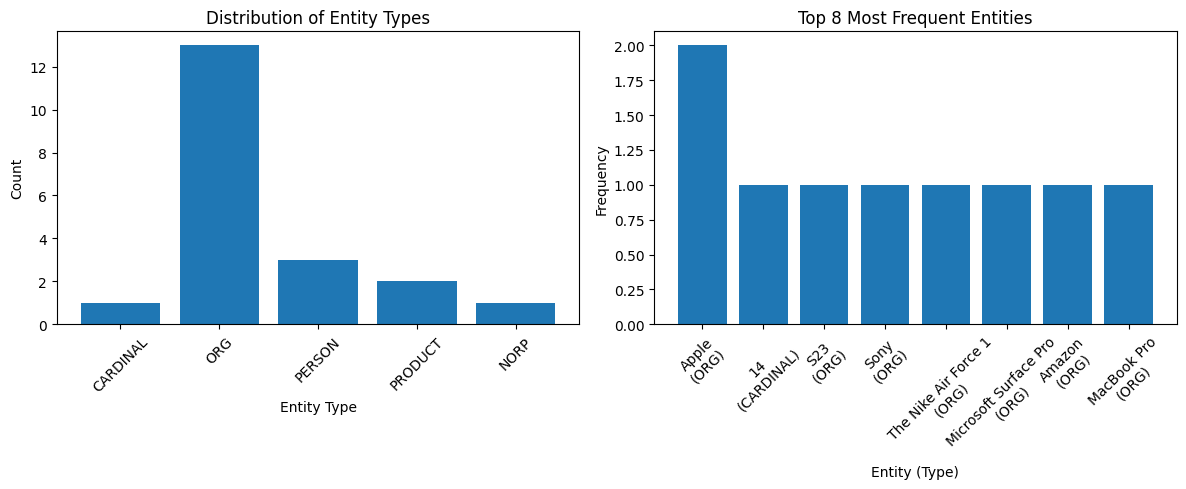

In [7]:
# Visualize the entity types
entity_labels = [label for (ent, label) in all_entities]
label_counts = Counter(entity_labels)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(label_counts.keys(), label_counts.values())
plt.title('Distribution of Entity Types')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
# Show top entities
top_entities = dict(entity_counts.most_common(8))
plt.bar([f"{ent}\n({label})" for (ent, label) in top_entities.keys()], top_entities.values())
plt.title('Top 8 Most Frequent Entities')
plt.xlabel('Entity (Type)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [8]:
# Rule-based sentiment analysis using keyword matching
print("😊😠 PERFORMING SENTIMENT ANALYSIS...")
print("=" * 50)

# Define sentiment keywords
positive_words = ['amazing', 'incredible', 'perfect', 'excellent', 'outstanding',
                 'love', 'best', 'fantastic', 'great', 'comfortable', 'good',
                 'mind-blowing', 'stunning', 'fast', 'reliable', 'powerful']

negative_words = ['terrible', 'poor', 'disappointed', 'disappointing', 'nightmare',
                 'expensive', 'overpriced', 'slow', 'small', 'loud', 'could be better']

def analyze_sentiment(text):
    doc = text.lower()
    positive_score = sum(1 for word in positive_words if word in doc)
    negative_score = sum(1 for word in negative_words if word in doc)

    if positive_score > negative_score:
        return "POSITIVE", positive_score, negative_score
    elif negative_score > positive_score:
        return "NEGATIVE", positive_score, negative_score
    else:
        return "NEUTRAL", positive_score, negative_score

# Analyze sentiment for each review
sentiment_results = []

print("\n📊 SENTIMENT ANALYSIS RESULTS:")
print("=" * 50)

for i, review in enumerate(amazon_reviews, 1):
    sentiment, pos_score, neg_score = analyze_sentiment(review)
    sentiment_results.append(sentiment)

    print(f"\nReview {i}:")
    print(f"  Text: {review}")
    print(f"  Sentiment: {sentiment} (+{pos_score}/-{neg_score})")

# Overall sentiment distribution
sentiment_dist = Counter(sentiment_results)
print("\n" + "=" * 50)
print("📈 OVERALL SENTIMENT DISTRIBUTION:")
print("=" * 50)
for sentiment, count in sentiment_dist.items():
    print(f"  {sentiment}: {count} reviews ({count/len(amazon_reviews)*100:.1f}%)")

😊😠 PERFORMING SENTIMENT ANALYSIS...

📊 SENTIMENT ANALYSIS RESULTS:

Review 1:
  Text: I bought the iPhone 14 from Apple and it's amazing! The battery life is incredible.
  Sentiment: POSITIVE (+2/-0)

Review 2:
  Text: This Samsung Galaxy S23 is terrible. The camera quality is poor and it overheats.
  Sentiment: NEGATIVE (+0/-2)

Review 3:
  Text: Just got the Sony WH-1000XM4 headphones and the noise cancellation is mind-blowing!
  Sentiment: POSITIVE (+1/-0)

Review 4:
  Text: The Nike Air Force 1 shoes are comfortable but the quality could be better.
  Sentiment: NEUTRAL (+1/-1)

Review 5:
  Text: Microsoft Surface Pro is perfect for work, but the price is too high.
  Sentiment: POSITIVE (+1/-0)

Review 6:
  Text: This Dell XPS laptop from Amazon is the best computer I've ever owned!
  Sentiment: POSITIVE (+1/-0)

Review 7:
  Text: The Google Pixel 7 camera is outstanding, but battery life is disappointing.
  Sentiment: NEUTRAL (+1/-1)

Review 8:
  Text: I love my new MacBook Pro fro

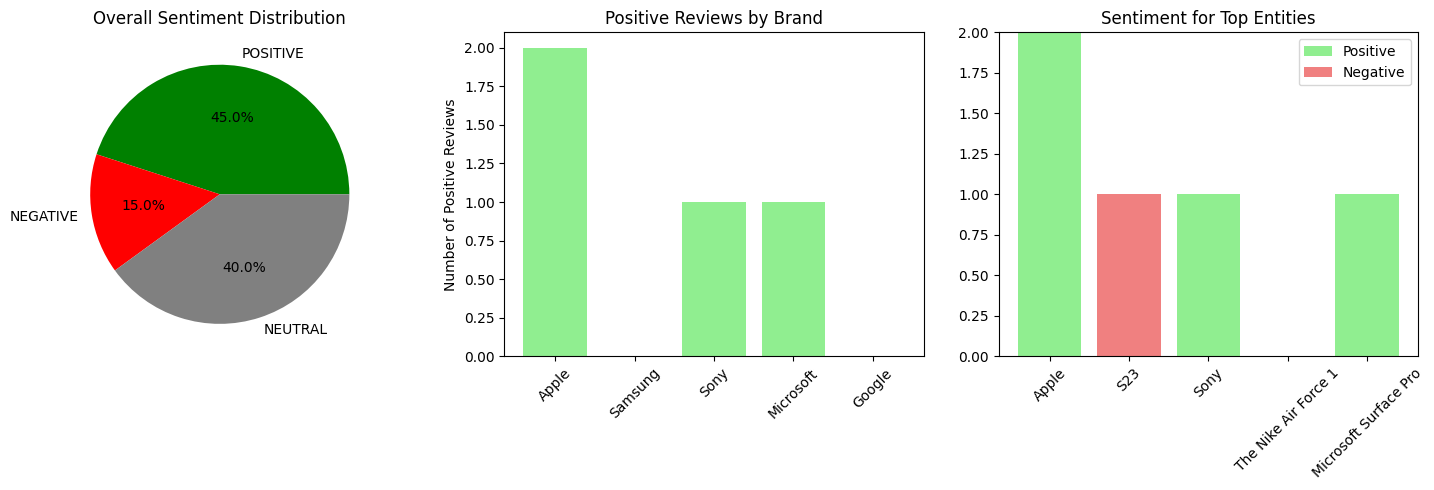

In [9]:
# Visualize sentiment analysis
plt.figure(figsize=(15, 5))

# Sentiment distribution
plt.subplot(1, 3, 1)
colors = ['green', 'red', 'gray']
plt.pie(sentiment_dist.values(), labels=sentiment_dist.keys(), autopct='%1.1f%%', colors=colors)
plt.title('Overall Sentiment Distribution')

# Sentiment by entity (simplified)
plt.subplot(1, 3, 2)
# Let's analyze sentiment for some major brands
brand_sentiments = {}
major_brands = ['Apple', 'Samsung', 'Sony', 'Microsoft', 'Google']

for brand in major_brands:
    brand_reviews = [review for review in amazon_reviews if brand.lower() in review.lower()]
    if brand_reviews:
        sentiments = [analyze_sentiment(review)[0] for review in brand_reviews]
        brand_sentiments[brand] = Counter(sentiments)

# Plot brand sentiments
if brand_sentiments:
    brands = list(brand_sentiments.keys())
    positive_counts = [brand_sentiments[brand].get('POSITIVE', 0) for brand in brands]

    plt.bar(brands, positive_counts, color='lightgreen')
    plt.title('Positive Reviews by Brand')
    plt.xticks(rotation=45)
    plt.ylabel('Number of Positive Reviews')

# Entity-sentiment correlation
plt.subplot(1, 3, 3)
entity_sentiment = []
for i, (review, sentiment) in enumerate(zip(amazon_reviews, sentiment_results)):
    doc = nlp(review)
    for ent in doc.ents:
        if ent.label_ in ['ORG', 'PRODUCT']:
            entity_sentiment.append((ent.text, sentiment))

# Count entity-sentiment pairs
from collections import defaultdict
entity_sentiment_count = defaultdict(lambda: {'POSITIVE': 0, 'NEGATIVE': 0, 'NEUTRAL': 0})
for entity, sentiment in entity_sentiment:
    entity_sentiment_count[entity][sentiment] += 1

# Plot top entities with sentiment
top_entities = sorted(entity_sentiment_count.items(),
                     key=lambda x: sum(x[1].values()), reverse=True)[:5]

entities = [ent for ent, _ in top_entities]
positive = [counts['POSITIVE'] for _, counts in top_entities]
negative = [counts['NEGATIVE'] for _, counts in top_entities]

if entities:
    x = range(len(entities))
    plt.bar(x, positive, label='Positive', color='lightgreen')
    plt.bar(x, negative, bottom=positive, label='Negative', color='lightcoral')
    plt.xticks(x, entities, rotation=45)
    plt.title('Sentiment for Top Entities')
    plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# Final comprehensive results
print("🎯 TASK 3: COMPREHENSIVE RESULTS SUMMARY")
print("=" * 60)

print(f"\n📊 BASIC STATISTICS:")
print(f"  • Total Reviews Analyzed: {len(amazon_reviews)}")
print(f"  • Total Entities Extracted: {len(all_entities)}")
print(f"  • Unique Entity Types: {len(set(label for _, label in all_entities))}")
print(f"  • Product/Brand Entities: {len(product_entities)}")

print(f"\n😊 SENTIMENT ANALYSIS:")
for sentiment, count in sentiment_dist.items():
    print(f"  • {sentiment}: {count} reviews")

print(f"\n🏆 TOP EXTRACTED PRODUCTS/BRANDS:")
product_org_entities = [(ent, label) for (ent, label) in all_entities if label in ['ORG', 'PRODUCT']]
top_products = Counter([ent for ent, label in product_org_entities]).most_common(5)
for product, count in top_products:
    print(f"  • {product}: {count} mentions")

print(f"\n🔍 SAMPLE EXTRACTED INSIGHTS:")
# Show some interesting insights
positive_reviews_with_entities = []
negative_reviews_with_entities = []

for i, (review, sentiment) in enumerate(zip(amazon_reviews, sentiment_results)):
    doc = nlp(review)
    entities = [ent.text for ent in doc.ents if ent.label_ in ['ORG', 'PRODUCT']]
    if entities:
        if sentiment == 'POSITIVE':
            positive_reviews_with_entities.append((review, entities))
        elif sentiment == 'NEGATIVE':
            negative_reviews_with_entities.append((review, entities))

print("\n  Positive Insights:")
for review, entities in positive_reviews_with_entities[:2]:
    print(f"    ✓ {review} → Entities: {entities}")

print("\n  Negative Insights:")
for review, entities in negative_reviews_with_entities[:2]:
    print(f"    ✗ {review} → Entities: {entities}")

print("\n✅ TASK 3 COMPLETED SUCCESSFULLY!")

🎯 TASK 3: COMPREHENSIVE RESULTS SUMMARY

📊 BASIC STATISTICS:
  • Total Reviews Analyzed: 20
  • Total Entities Extracted: 20
  • Unique Entity Types: 5
  • Product/Brand Entities: 15

😊 SENTIMENT ANALYSIS:
  • POSITIVE: 9 reviews
  • NEGATIVE: 3 reviews
  • NEUTRAL: 8 reviews

🏆 TOP EXTRACTED PRODUCTS/BRANDS:
  • Apple: 2 mentions
  • S23: 1 mentions
  • Sony: 1 mentions
  • The Nike Air Force 1: 1 mentions
  • Microsoft Surface Pro: 1 mentions

🔍 SAMPLE EXTRACTED INSIGHTS:

  Positive Insights:
    ✓ I bought the iPhone 14 from Apple and it's amazing! The battery life is incredible. → Entities: ['Apple']
    ✓ Just got the Sony WH-1000XM4 headphones and the noise cancellation is mind-blowing! → Entities: ['Sony']

  Negative Insights:
    ✗ This Samsung Galaxy S23 is terrible. The camera quality is poor and it overheats. → Entities: ['S23']
    ✗ This HP printer is a nightmare! It constantly jams and the ink is expensive. → Entities: ['HP']

✅ TASK 3 COMPLETED SUCCESSFULLY!
